# Packages

In [1]:
import ISLP

In [2]:
dir(ISLP)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_confusion_matrix',
 '_datasets',
 '_index',
 '_make_categorical',
 '_ordered',
 '_unordered',
 '_version',
 'as_file',
 'confusion_table',
 'files',
 'load_data',
 'np',
 'pd',
 'pjoin',
 'unique_labels']

In [3]:
from ISLP import load_data
import statsmodels.api as sm
from ISLP.models import (ModelSpec as MS,summarize,poly)
from matplotlib.pyplot import subplots

# 8. Auto

## a)

In [4]:
Auto = load_data('Auto')
Auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1


In [5]:
x = MS(['horsepower']).fit_transform(Auto)
y = Auto['mpg']
model = sm.OLS(y,x)
result = model.fit()
summarize(result)

,coef,std err,t,P>|t|
intercept,39.9359,0.717,55.660,0.0
horsepower,-0.1578,0.006,-24.489,0.0


### i.) Is there a relationship between the predictor and the response

Avec un p-value = 0 < alpha = 0.01, la puissance du moteur explique très significativement la consommation du carburant d'une voiture.

### iii.) Is the relationship between the predictor and the response positive or negative?

Le coefficient est égal à -0.15, négatif.

### iv. What is the predicted mpg associated with a horsepower of 98? What are the associated 95% confidence and prediction intervals?

In [6]:
horsepower_new = [1, 98]
new_prediction = result.get_prediction(horsepower_new)
print("pour uune voiture de 98 cheveaux, on prédit:", new_prediction.predicted, "miles per gallon")

pour uune voiture de 98 cheveaux, on prédit: [24.46707715] miles per gallon


In [7]:
new_prediction.df

np.float64(390.0)

In [8]:
dir(new_prediction)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'conf_int',
 'df',
 'dist',
 'dist_args',
 'predicted',
 'predicted_mean',
 'row_labels',
 'se',
 'se_mean',
 'se_obs',
 'summary_frame',
 'var_pred',
 'var_pred_mean',
 'var_resid']

## b) Plot the response and the predictor

In [ ]:
def abline (ax, b, m, *args, **kwargs):
    xlim = ax.get_xlim()
    ylim = [m*xlim[0] + b , m*xlim[1] + b]
    ax.plot(xlim, ylim, *args, **kwargs)

C:\Users\Mita\AppData\Local\Temp\ipykernel_788\20067468.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  result.params[0],
C:\Users\Mita\AppData\Local\Temp\ipykernel_788\20067468.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  result.params[1],


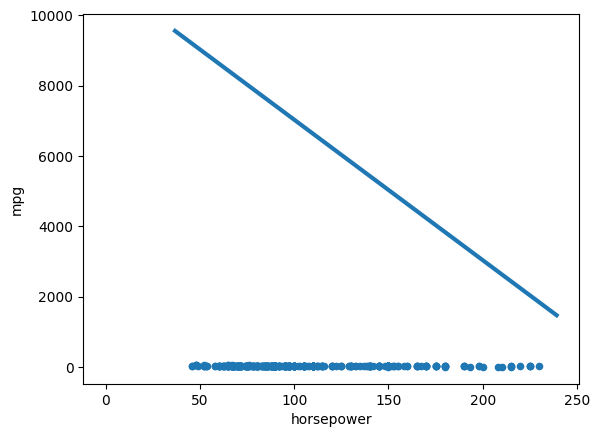

In [28]:
ax = Auto.plot.scatter('horsepower', 'mpg')

abline(ax,
       result.params[0],
       result.params[1],
       'r--',
       linewidth=3)

C:\Users\Mita\AppData\Local\Temp\ipykernel_788\3130680768.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  result.params[0],


# c) Diagnostic plots of least squares regression fit

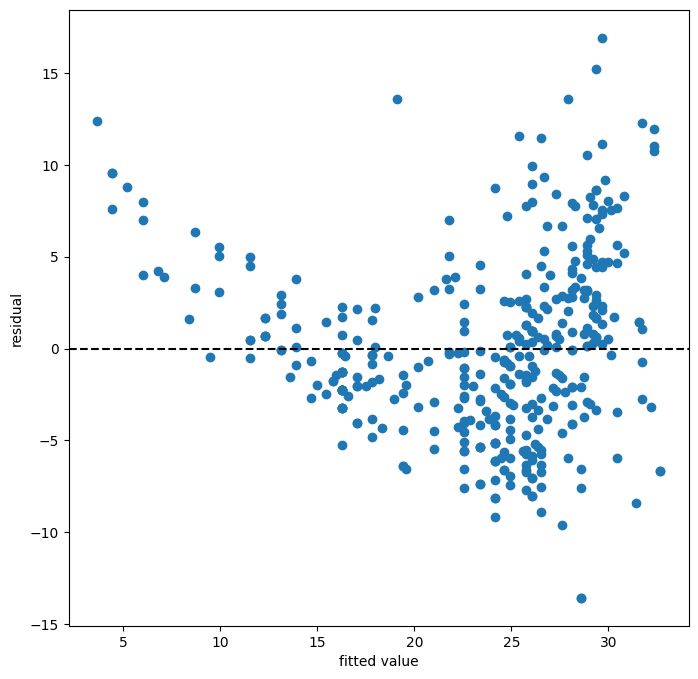

In [12]:
ax = subplots(figsize = (8,8))[1]
ax.scatter(result.fittedvalues, result.resid)
ax.set_xlabel("fitted value")
ax.set_ylabel("residual")
ax.axhline(0, c='k', ls = '--')

| Résidu (`resid`) | Relation mathématique | Interprétation |
|-----------------|----------------------|----------------|
| `resid > 0`     | y > ŷ                | Le modèle **sous-estime** la valeur réelle |
| `resid < 0`     | y < ŷ                | Le modèle **surestime** la valeur réelle |
| `resid ≈ 0`     | y ≈ ŷ                | Bonne prédiction |

Lorsque la valeur prédite tourne autour de 20 mpg, le modèle performe mieux. Par contre, au fur et à mesure qu'on s'éloigne de ce centre, on constate la chutte de la performance.  

Si la valeur prédite est inférieure à 20, resid tend à être négatif et donc le modèle sous-estime la valeur réelle et vice-versa.